I checked if the coordinate time series are given all sources in the ICRF3 catalogs (S/X, K, and X/Ka band).

In [1]:
import numpy as np

from astropy.table import join, Table, vstack, unique, setdiff
import seaborn as sns
from statsmodels.iolib.table import (SimpleTable, default_txt_fmt)

from myprogs.catalog.read_icrf import read_icrf3

The list of radio sources with coordinate time series.

In [2]:
ts_stats = Table.read("../logs/ts_stat_nju_20210608.log", format="ascii")

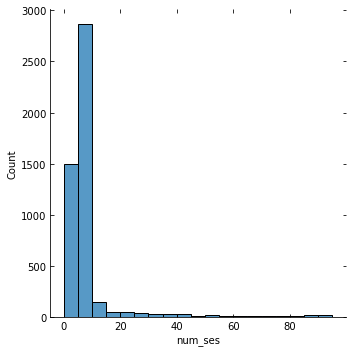

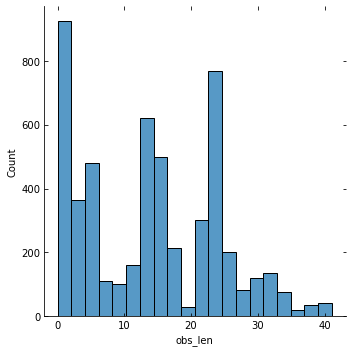

In [3]:
tmp = ts_stats.to_pandas()
sns.displot(tmp, x="num_ses", bins=np.arange(0, 100, 5))
sns.displot(tmp, x="obs_len", bins=20)

The ICRF3 catalogs.

In [4]:
icrf3_sx = read_icrf3(wv="sx")
icrf3_k = read_icrf3(wv="k")
icrf3_xka = read_icrf3(wv="xka")

icrf3_sx.keep_columns(["iers_name", "type"])
icrf3_k.keep_columns(["iers_name", "type"])
icrf3_xka.keep_columns(["iers_name", "type"])

In [5]:
icrf3 =vstack((icrf3_sx, icrf3_k))
icrf3 = vstack((icrf3, icrf3_xka))

icrf3 = unique(icrf3, keys="iers_name")

Cross-match with the ICRF3 catalogs.

In [6]:
sx_list = join(ts_stats, icrf3_sx)
k_list = join(ts_stats, icrf3_k)
xka_list = join(ts_stats, icrf3_xka)

icrf3_list = join(ts_stats, icrf3)

ICRF3 defining source list.

In [7]:
mask = sx_list["type"] == "D"
sx_def = sx_list[mask]

mask = k_list["type"] == "D"
k_def = k_list[mask]

mask = xka_list["type"] == "D"
xka_def = xka_list[mask]

mask = icrf3_list["type"] == "D"
icrf3_def = icrf3_list[mask]

In [8]:
def simple_func(tab):
    """
    """
    
    N_all = len(tab)
    mask = tab["num_ses"] >= 5
    
    N_ge5 = len(tab[mask])
    N_lt5 = N_all - N_ge5
    
    return N_all, N_ge5, N_lt5

In [9]:
# all
N0, N1, N2 = simple_func(ts_stats)

# icrf3 sources
N_0, N_1, N_2 = simple_func(icrf3_list)

# Not included
N_not0 = N0 - N_0
N_not1 = N1 - N_1
N_not2 = N2 - N_2

N_def0, N_def1, N_def2 = simple_func(icrf3_def)

N_oth0 = N_0 - N_def0
N_oth1 = N_1 - N_def1
N_oth2 = N_2 - N_def2

In [10]:
N_sx0, N_sx1, N_sx2 = simple_func(sx_list)

N_sx_not0 = N0 - N_sx0
N_sx_not1 = N1 - N_sx1
N_sx_not2 = N2 - N_sx2

N_sx_def0, N_sx_def1, N_sx_def2 = simple_func(sx_def)

N_sx_oth0 = N_sx0 - N_sx_def0
N_sx_oth1 = N_sx1 - N_sx_def1
N_sx_oth2 = N_sx2 - N_sx_def2

In [11]:
N_k0, N_k1, N_k2 = simple_func(k_list)

N_k_not0 = N0 - N_k0
N_k_not1 = N1 - N_k1
N_k_not2 = N2 - N_k2

N_k_def0, N_k_def1, N_k_def2 = simple_func(k_def)

N_k_oth0 = N_k0 - N_k_def0
N_k_oth1 = N_k1 - N_k_def1
N_k_oth2 = N_k2 - N_k_def2

In [12]:
N0, N1, N2 = simple_func(ts_stats)
N_xka0, N_xka1, N_xka2 = simple_func(xka_list)

N_xka_not0 = N0 - N_xka0
N_xka_not1 = N1 - N_xka1
N_xka_not2 = N2 - N_xka2

N_xka_def0, N_xka_def1, N_xka_def2 = simple_func(xka_def)

N_xka_oth0 = N_xka0 - N_xka_def0
N_xka_oth1 = N_xka1 - N_xka_def1
N_xka_oth2 = N_xka2 - N_xka_def2

In [18]:
se = np.vstack([[N0, N1, N2],
                [N_0, N_1, N_2],
                [N_not0, N_not1, N_not2],
                [N_def0, N_def1, N_def2],
                [N_oth0, N_oth1, N_oth2],
                [N_sx0, N_sx1, N_sx2],
                [N_sx_not0, N_sx_not1, N_sx_not2],
                [N_sx_def0, N_sx_def1, N_sx_def2],
                [N_sx_oth0, N_sx_oth1, N_sx_oth2],
                [N_k0, N_k1, N_k2],
                [N_k_not0, N_k_not1, N_k_not2],
                [N_k_def0, N_k_def1, N_k_def2],
                [N_k_oth0, N_k_oth1, N_k_oth2],
                [N_xka0, N_xka1, N_xka2],
                [N_xka_not0, N_xka_not1, N_xka_not2],
                [N_xka_def0, N_xka_def1, N_xka_def2],
                [N_xka_oth0, N_xka_oth1, N_xka_oth2]])


colnames = ["All", "N_sess>=5", "N_sess<5"]
rownames = ["All",
            "ICRF3-Com", "ICRF3-Not", "ICRF3-Def", "ICRF3-Oth",
            "SX-Com", "SX-Not", "SX-Def", "SX-Oth",
            "K-Com", "K-Not", "K-Def", "K-Oth",
            "XKa-Com", "XKa-Not", "XKa-Def", "XKa-Oth"]


tabl = SimpleTable(se, colnames, rownames, txt_fmt=default_txt_fmt)
print(tabl)
print("`Com' for common \n"
      "`Not' for not included in this catalog\n"
      "`Def' for ICRF3 defining sources\n"
      "`Oth' for non-defining sources.\n")

print("Source in the ICRF3 catlogs but not given the time series:")
print("SX :", len(icrf3_sx)-len(sx_list))
print("K  :", len(icrf3_k)-len(k_list))
print("XKa:", len(icrf3_xka)-len(xka_list))
print("All:", len(icrf3)-len(icrf3_list))

          All  N_sess>=5 N_sess<5
---------------------------------
All       5290      3790     1500
ICRF3-Com 4554      3720      834
ICRF3-Not  736        70      666
ICRF3-Def  303       302        1
ICRF3-Oth 4251      3418      833
SX-Com    4536      3718      818
SX-Not     754        72      682
SX-Def     303       302        1
SX-Oth    4233      3416      817
K-Com      808       726       82
K-Not     4482      3064     1418
K-Def      193       192        1
K-Oth      615       534       81
XKa-Com    646       591       55
XKa-Not   4644      3199     1445
XKa-Def    176       176        0
XKa-Oth    470       415       55
---------------------------------
`Com' for common 
`Not' for not included in this catalog
`Def' for ICRF3 defining sources
`Oth' for non-defining sources.

Source in the ICRF3 catlogs but not given the time series:
SX : 0
K  : 16
XKa: 32
All: 34


Create a list of sources with $N_{sess}>5$.

In [14]:
mask = ts_stats["num_ses"] >= 5
new_tab = ts_stats[mask]

new_tab.write("../data/sou_#ses_gt_5.list",
              format="ascii",
              include_names=["iers_name"],
              overwrite=True)

Find the ICRF3 defining sources not included in the time series.

In [15]:
icrf3_def = icrf3_sx[icrf3_sx["type"] == "D"]
setdiff(icrf3_def, sx_def, keys="iers_name")

iers_name,type
str8,str1


In [16]:
setdiff(icrf3_sx, sx_list, keys="iers_name")

iers_name,type
str8,str1
